Imported Libraries

In [ ]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

Defined start and end dates by datetime libraries

In [24]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

Read data of banks from yahoo website

In [25]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [26]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

In [27]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [28]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [29]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [30]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   35.054218  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04   34.681938  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05   34.726604  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06   34.674480  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09   34.696808  487.399994  483.000000  486.000000  483.899994  ...   

Bank Ticker         MS                                         WFC             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  37.429329  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  37.455013  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.557716  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.596241  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.994202  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.408512  
2006-01-04   31.799999  31.530001  10870000.0  20.171795  
2006-01-05   31.500000  31.495001  10158000.0  20.149401  
2006-01-06   31.580000  31.680000   8403800.0  20.267757  
2006-01-09   31.674999  31.674999   5619600.0  20.264565  

[5 rows x 36 columns]

In [31]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      564.099976
GS     247.919998
JPM     70.080002
MS      89.300003
WFC     58.520000
dtype: float64

** Created a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [32]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).

** What is the max Close price for each bank's stock throughout the time period?**

** Created a pairplot using seaborn of the returns dataframe. What stock stands out to you?**

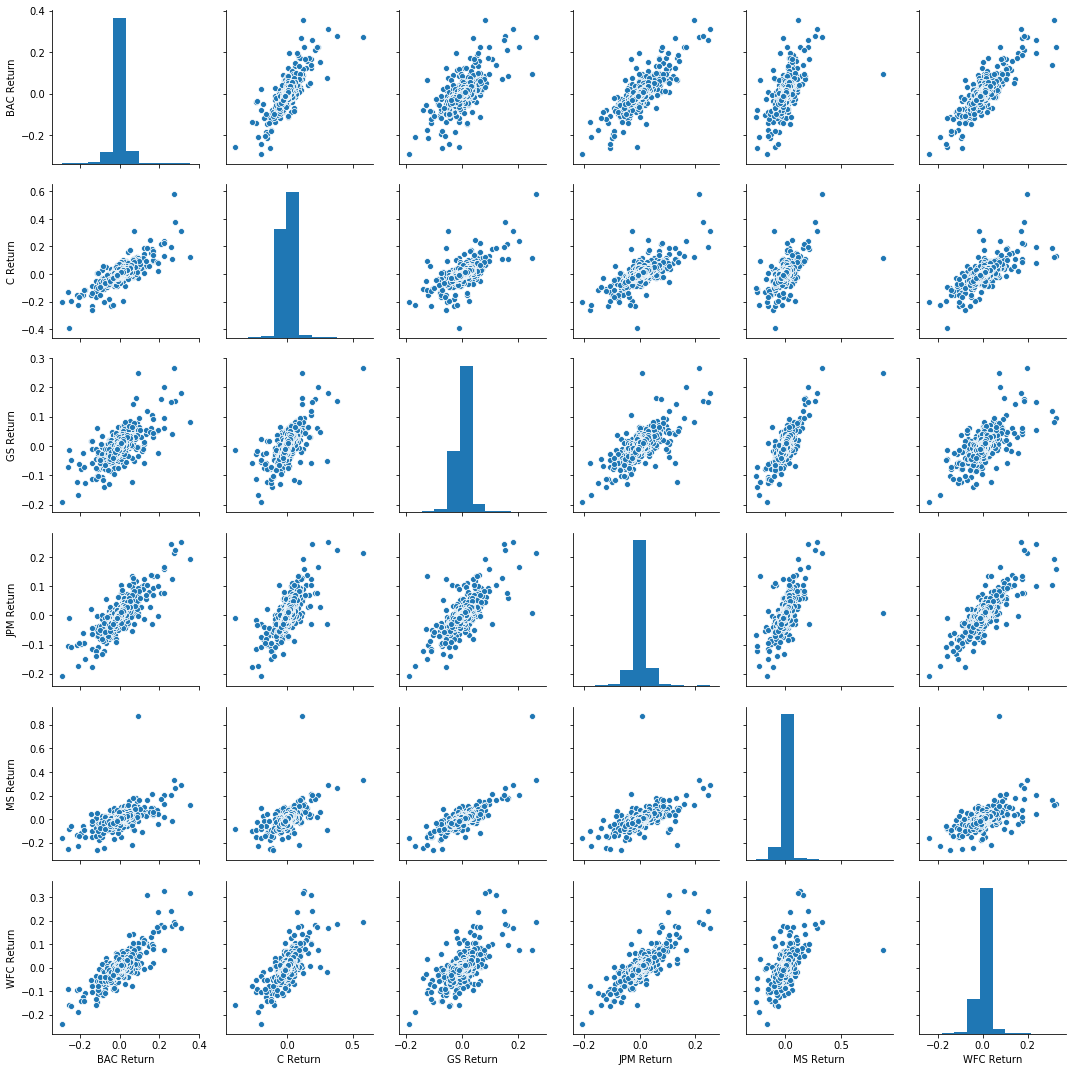

In [34]:
#returns[1:]
import seaborn as sns
sns.pairplot(returns[1:])

** Using this returns DataFrame, what dates each bank stock had the best and worst single day returns. I noticed that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [35]:
# Worst Drop (4 of them on Inauguration day)
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

** Citigroup's largest drop and biggest gain were very close to one another, did anything significant happen in that time frame? **

In [36]:
returns.std() # Citigroup riskiest

BAC Return    0.036647
C Return      0.038672
GS Return     0.025390
JPM Return    0.027667
MS Return     0.037819
WFC Return    0.030238
dtype: float64

In [37]:
returns.ix['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

/Users/sohamshinde/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

/Users/sohamshinde/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


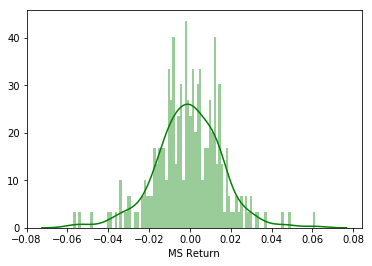

In [38]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

/Users/sohamshinde/opt/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


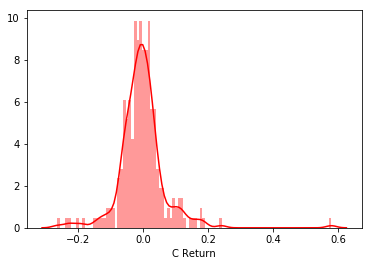

In [39]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Visualization libraries to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

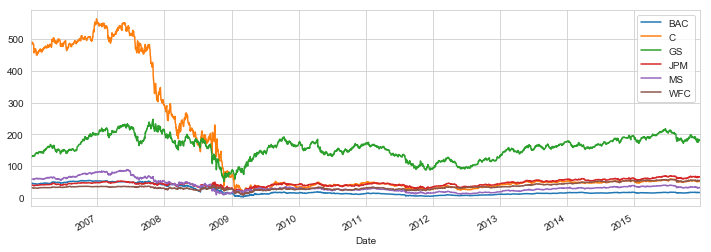

In [41]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()